In [59]:
import pandas as pd

In [60]:
!pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [61]:
df = pd.read_csv("../data/telco_churn.csv")

In [62]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [64]:
df.shape
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='str')

In [65]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [66]:
X.shape

(7043, 20)

In [67]:
df.dtypes

customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn                   str
dtype: object

In [68]:
X = X.drop("customerID", axis=1)

In [69]:
X = pd.get_dummies(X, drop_first=True)


In [70]:
X.shape

(7043, 6559)

In [71]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [72]:
df.dtypes

customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn                   str
dtype: object

In [73]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [74]:
df["TotalCharges"].isnull().sum()

np.int64(11)

In [75]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [76]:
X = df.drop("Churn", axis=1)
X = X.drop("customerID", axis=1)
X = pd.get_dummies(X, drop_first=True)
X.shape


(7043, 30)

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [79]:
le = LabelEncoder()
y = le.fit_transform(y)

In [80]:
pd.Series(y).value_counts()

0    5174
1    1869
Name: count, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [82]:
X_train.shape



(5634, 30)

In [83]:
X_test.shape

(1409, 30)

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [85]:
pd.Series(y_train).value_counts(normalize=True)


0    0.734647
1    0.265353
Name: proportion, dtype: float64

In [86]:
pd.Series(y_test).value_counts(normalize=True)

0    0.734564
1    0.265436
Name: proportion, dtype: float64

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [89]:
y_pred = model.predict(X_test_scaled)

In [90]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8069552874378992

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [92]:
from sklearn.linear_model import LogisticRegression

model_balanced = LogisticRegression(max_iter=1000, class_weight="balanced")

model_balanced.fit(X_train_scaled, y_train)

y_pred_balanced = model_balanced.predict(X_test_scaled)

In [93]:
y_prob = model_balanced.predict_proba(X_test_scaled)[:,1]

In [94]:
final_threshold = 0.55

y_final_pred = (y_prob >= final_threshold).astype(int)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_final_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_final_pred))

Accuracy: 0.7544357700496807

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.53      0.76      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409



In [96]:
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


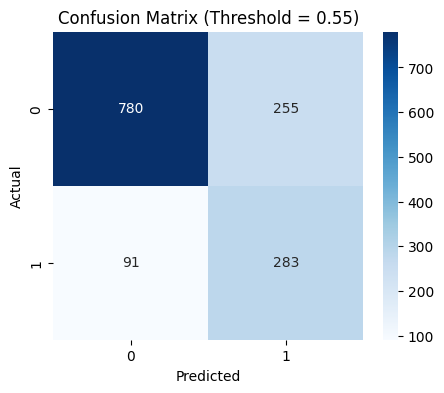

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_final_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Threshold = 0.55)")
plt.show()

In [98]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.8412333049161694


In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

scores = cross_val_score(pipeline, X, y, cv=5, scoring="roc_auc")

print("AUC scores:", scores)
print("Mean AUC:", np.mean(scores))

AUC scores: [0.85851611 0.85881836 0.83303237 0.83763453 0.83908346]
Mean AUC: 0.8454169670915433


In [100]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

gb_model = GradientBoostingClassifier(random_state=42)

gb_scores = cross_val_score(gb_model, X, y, cv=5, scoring="roc_auc")

print("Gradient Boosting AUC scores:", gb_scores)
print("Mean AUC:", np.mean(gb_scores))

Gradient Boosting AUC scores: [0.85686791 0.85520163 0.82995944 0.84288508 0.84106812]
Mean AUC: 0.8451964377983092


In [101]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [103]:
feature_names = X.columns
coefficients = model_balanced.coef_[0]

In [104]:
import pandas as pd

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

importance_df = importance_df.sort_values(by="Coefficient", ascending=False)

importance_df.head(10)

,Feature,Coefficient
10,InternetService_Fiber optic,0.808185
3,TotalCharges,0.480656
23,StreamingMovies_Yes,0.285773
21,StreamingTV_Yes,0.272630
9,MultipleLines_Yes,0.200552
28,PaymentMethod_Electronic check,0.188980
26,PaperlessBilling_Yes,0.164849
17,DeviceProtection_Yes,0.057923
0,SeniorCitizen,0.056599
7,PhoneService_Yes,0.024299


In [105]:
importance_df.tail(10)

,Feature,Coefficient
18,TechSupport_No internet service,-0.098720
16,DeviceProtection_No internet service,-0.098720
14,OnlineBackup_No internet service,-0.098720
20,StreamingTV_No internet service,-0.098720
6,Dependents_Yes,-0.105446
13,OnlineSecurity_Yes,-0.115162
24,Contract_One year,-0.296815
25,Contract_Two year,-0.618584
2,MonthlyCharges,-1.031676
1,tenure,-1.146565


## Final Production Model

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

final_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

final_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('logreg', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not w

In [107]:
y_prob_final = final_pipeline.predict_proba(X_test)[:, 1]

final_threshold = 0.55
y_final = (y_prob_final >= final_threshold).astype(int)

In [108]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

print("Final Accuracy:", accuracy_score(y_test, y_final))
print("Final ROC-AUC:", roc_auc_score(y_test, y_prob_final))

print("\nFinal Classification Report:\n")
print(classification_report(y_test, y_final))

Final Accuracy: 0.7544357700496807
Final ROC-AUC: 0.8412333049161694

Final Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.53      0.76      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409



In [109]:
import joblib

joblib.dump({
    "model": final_pipeline,
    "threshold": final_threshold
}, "../models/churn_model.pkl")

['../models/churn_model.pkl']

# visuals

## 1. Dataset Overview

In [110]:
df.shape
df.info()
df["Churn"].value_counts(normalize=True) * 100

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

# 2. Target Variable Distribution


/var/folders/8z/3060h7ws5t9dxrnq6wvfl7rc0000gn/T/ipykernel_85465/1199349134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


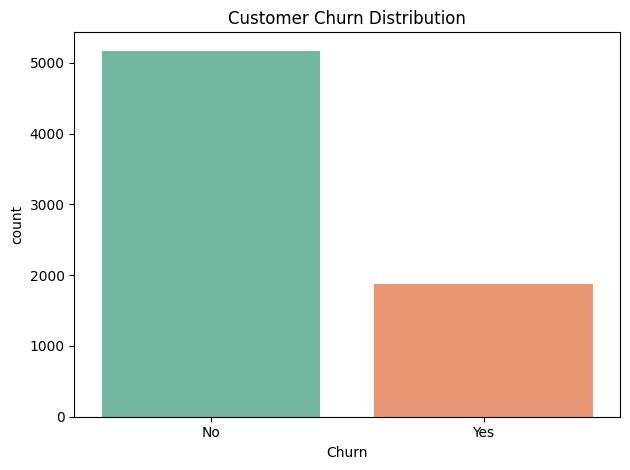

In [111]:
plt.figure()
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Customer Churn Distribution")
plt.tight_layout()
plt.savefig("01_churn_distribution.png", dpi=300)
plt.show()

## 3. Univariate Analysis


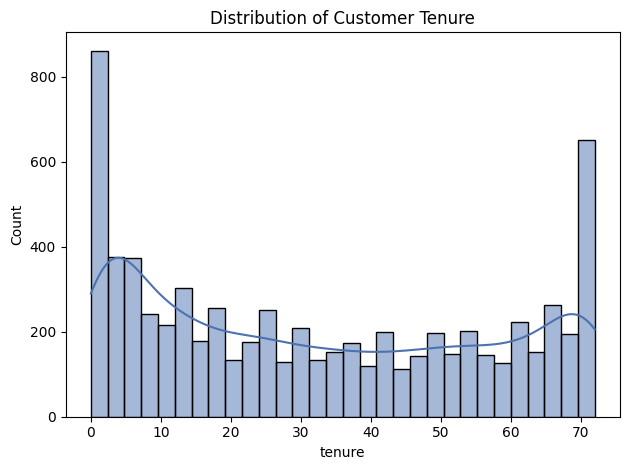

In [112]:
plt.figure()
sns.histplot(df["tenure"], bins=30, kde=True, color="#4C72B0")
plt.title("Distribution of Customer Tenure")
plt.tight_layout()
plt.savefig("02_tenure_distribution.png", dpi=300)
plt.show()

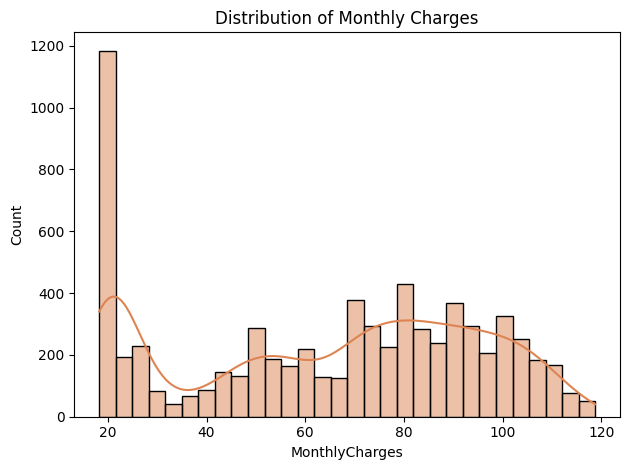

In [113]:
plt.figure()
sns.histplot(df["MonthlyCharges"], bins=30, kde=True, color="#DD8452")
plt.title("Distribution of Monthly Charges")
plt.tight_layout()
plt.savefig("03_monthly_charges_distribution.png", dpi=300)
plt.show()

## 4. Bivariate Analysis

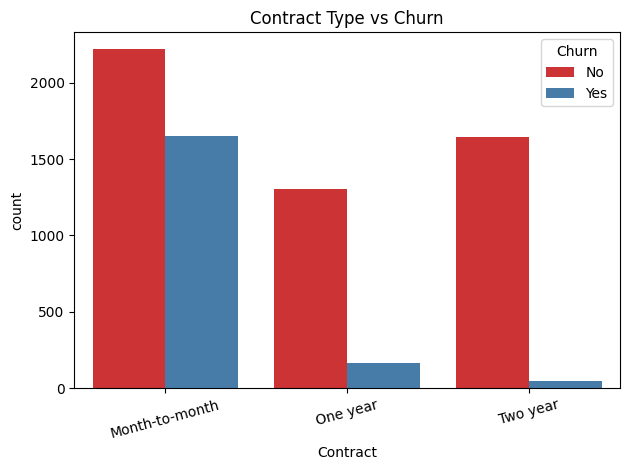

In [114]:
plt.figure()
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set1")
plt.title("Contract Type vs Churn")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("04_contract_vs_churn.png", dpi=300)
plt.show()

/var/folders/8z/3060h7ws5t9dxrnq6wvfl7rc0000gn/T/ipykernel_85465/18808318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="tenure", data=df, palette="Set3")


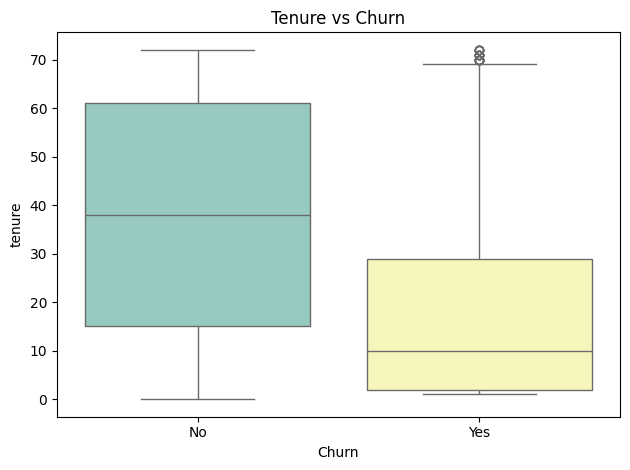

In [115]:
plt.figure()
sns.boxplot(x="Churn", y="tenure", data=df, palette="Set3")
plt.title("Tenure vs Churn")
plt.tight_layout()
plt.savefig("05_tenure_vs_churn.png", dpi=300)
plt.show()

## 5. Correlation Analysis

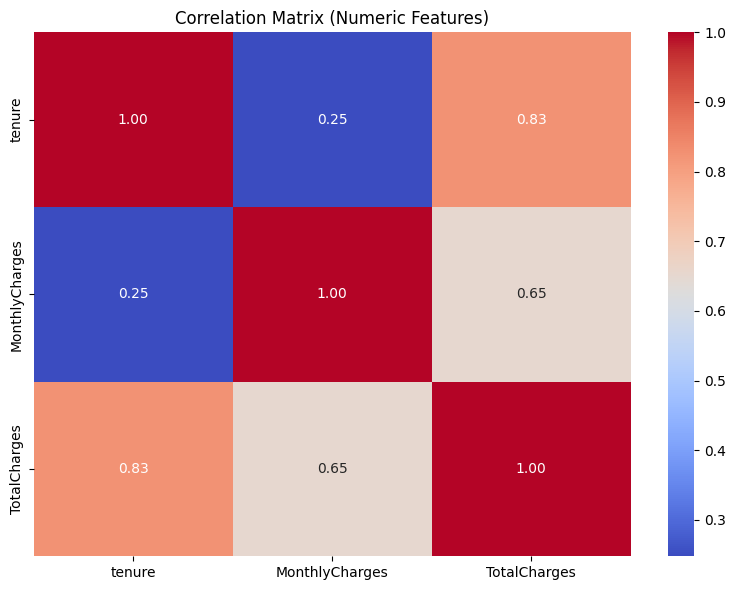

In [116]:
plt.figure(figsize=(8,6))
corr = df[["tenure", "MonthlyCharges", "TotalCharges"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.tight_layout()
plt.savefig("06_correlation_matrix.png", dpi=300)
plt.show()